### 此例使用高斯白雜訊(AWGN)來產生錯誤, 將ANcode對比通道碼(ex:Hamming_code)

In [1]:
import numpy as np
from numpy.random import rand, randn, randint
import random
import matplotlib.pyplot as plt
from numpy import sqrt

### 增加位元數:輸入資料取26-bits, Single AWE A=83, Double AWE A=13837

## Single AWE ANcode Decoder(A=83)

In [8]:

def A83_AN_decoder(residue):
    msg = {  
        1: +2**0,
        2: +2**1,
        4: +2**2,
        8: +2**3,
        16: +2**4,
        32: +2**5,
        64: +2**6,
        45: +2**7,
        7: +2**8,
        14: +2**9,
        28: +2**10,
        56: +2**11,
        29: +2**12,
        58: +2**13,
        33: +2**14,
        66: +2**15,
        49: +2**16,
        15: +2**17,
        30: +2**18,
        60: +2**19,
        37: +2**20,
        74: +2**21,
        65: +2**22,
        47: +2**23,
        11: +2**24,
        22: +2**25,
        44: +2**26,
        5: +2**27,
        10: +2**28,
        20: +2**29,
        40: +2**30,
        80: +2**31,
        77: +2**32,
        71: +2**33,
        59: +2**34,
        35: +2**35,
        70: +2**36,
        57: +2**37,
        31: +2**38,
        62: +2**39,
        41: +2**40,
        82: -2**0,
        81: -2**1,
        79: -2**2,
        75: -2**3,
        67: -2**4,
        51: -2**5,
        19: -2**6,
        38: -2**7,
        76: -2**8,
        69: -2**9,
        55: -2**10,
        27: -2**11,
        54: -2**12,
        25: -2**13,
        50: -2**14,
        17: -2**15,
        34: -2**16,
        68: -2**17,
        53: -2**18,
        23: -2**19,
        46: -2**20,
        9: -2**21,
        18: -2**22,
        36: -2**23,
        72: -2**24,
        61: -2**25,
        39: -2**26,
        78: -2**27,
        73: -2**28,
        63: -2**29,
        43: -2**30,
        3: -2**31,
        6: -2**32,
        12: -2**33,
        24: -2**34,
        48: -2**35,
        13: -2**36,
        26: -2**37,
        52: -2**38,
        21: -2**39,
        42: -2**40,
        0: 0,
    }
    return msg.get(residue, 0)  # 預設為 0，避免 None



def Barret_q_83(x):
    x = np.int64(x)
    q = (int(x) * 103493187) >> 33       ## (2^33)//83後, 右移33次         
    r = x - q * 83
    if r < 83:
        return (r,q)
    else:
        return (r - 83, q + 1)

In [9]:
# 傳遞資料為0 ~ 67108864(26-bits)的無號數整數
message=[]
message_count=10000000
for i in range(message_count):
    message.append(random.randint(0,67108864))
    
## A=83乘積編碼
codeword83=[]
for element in message:
    codeword83.append(element*83)
    
#turn *83 into binary
codeword83_bin=[]
for ele in codeword83:
    s='{0:033b}'.format(ele)
    codeword83_bin.append(s)
#codeword83_bin

#can be replaced by np.reshape
bit83_part=[]
for c_bin in codeword83_bin:
    for single_bit in c_bin:
            bit83_part.append(int(single_bit))
            
tran83=[]
for b in bit83_part:
    if b==1:
        tran83.append(1)
    else:
        tran83.append(0)

In [10]:
N = message_count*33
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
uncode_bler=[None]*itr
bler=[None]*itr

two_d_array_bler83=[None]*itr
q_ber83=[None]*itr

## uncode_bit = 2 * (rand(N) >= 0.5) - 1
## print(np.size(uncode_bit))
## print(np.size(tran83))


19


In [11]:
print(np.size(tran83))

330000000


In [12]:
#transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    x83=tran83  
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    uncode_bit_noise= x83 + noise_std * randn(N)

    ######  receive  for uncode_bit_noise ##########   
    receive83=[]
    for receive_bit in uncode_bit_noise:
        if(receive_bit >= 0.5):
            receive83.append(1)
        else:
            receive83.append(0)
    ################################################   
    

    #reshape
    temp83 = np.reshape(receive83, (message_count,33))
    #bit to decimal
    receive83_decimal = []
    

    for ele in temp83:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(32-ind)*val+int_out
        receive83_decimal.append(int_out)

    # 2d array 
    decode83_num_msg=[]
    decode83_num_codeword=[]
    q83_check_list=[]
    #10x10x2 array
    for i in range(message_count//100):
        receive83_decimal_100=[]
        receive83_decimal_100=receive83_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r83_list=[]
        q83_list=[]

        for ele in receive83_decimal_100:
            r,q=Barret_q_83(ele)
            r83_list.append(r)
            q83_list.append(q)

            q83_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r83_list[i],q83_list[i]]  

        error83_row=[]
        error83_col=[]
        for i in range(10):
            s_r83=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c83=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error83_row.append(s_r83)
            error83_col.append(s_c83)
        #turn into true false
        for ind,val in enumerate(error83_row):
            if(val!=0):
                error83_row[ind]=True
            else:
                error83_row[ind]=False

        for ind,val in enumerate(error83_col):
            if(val!=0):
                error83_col[ind]=True
            else:
                error83_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table83_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table83_for_row_col[i,j]=error83_row[i] and error83_col[j]

        true_false_table83_for_row_col=true_false_table83_for_row_col.reshape(100,1)
        error_index_from_TF83_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table83_for_row_col):
            if(ele):
                error_index_from_TF83_table=ind
                break

        if(error_index_from_TF83_table==-1):
            decode83_msg100=q83_list
            decode83_num_msg.extend(decode83_msg100)
            #print(len(decode83_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive83_decimal_100[error_index_from_TF83_table]
            r,q=Barret_q_83(error_codeword)
            RAW_DATA = np.int64(error_codeword) - np.int64(A83_AN_decoder(r))
            corrected_r,corrected_value = Barret_q_83(RAW_DATA)
            q83_list[ind] = corrected_value
            decode83_msg100 = q83_list
            decode83_num_msg.extend(decode83_msg100)
            #print(len(decode83_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER83_ERROR=0
    for c in range(len(decode83_num_msg)):
        if(decode83_num_msg[c] !=message[c]):
            BLER83_ERROR=BLER83_ERROR+1  
    two_d_array_bler83[n] =1.0 * BLER83_ERROR / message_count
    ########################################
    #uncode BLER
    uncode_error=0
    for b in range(message_count):
        if np.any(receive83_decimal[b] != codeword83[b]):
            uncode_error = uncode_error + 1  
    uncode_bler[n] =1.0 * uncode_error / message_count
    ## uncode BER
    uncode_ber_error = 0
    uncode_ber_error = sum(a != b for a, b in zip(x83, receive83))
    uncode_ber[n]= 1.0 * uncode_ber_error / N
    ########################################
    q83_num=0
    for i in range(len(decode83_num_msg)):
        if(message[i]!=q83_check_list[i]):
            q83_num = q83_num+1

    q_ber83[n]=1.*q83_num/len(decode83_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded BLER:", uncode_bler[n])
    print("Uncoded BER:", uncode_ber[n])
    print ("BLER without decoder:", q_ber83[n] )
    print ("BLER with decoder A=83:", two_d_array_bler83[n] )

EbNodB: 0
Uncoded BLER: 0.9998783
Uncoded BER: 0.23970650606060606
BLER without decoder: 0.999523
BLER with decoder A=83: 0.9995094
EbNodB: 1
Uncoded BLER: 0.9996391
Uncoded BER: 0.21382420303030303
BLER without decoder: 0.9988491
BLER with decoder A=83: 0.998822
EbNodB: 2
Uncoded BLER: 0.9989151
Uncoded BER: 0.18665111515151514
BLER without decoder: 0.9971321
BLER with decoder A=83: 0.9970594
EbNodB: 3
Uncoded BLER: 0.9967098
Uncoded BER: 0.15898431818181818
BLER without decoder: 0.9927949
BLER with decoder A=83: 0.9925982
EbNodB: 4
Uncoded BLER: 0.9903156
Uncoded BER: 0.13117365454545454
BLER without decoder: 0.9821927
BLER with decoder A=83: 0.9817621
EbNodB: 5
Uncoded BLER: 0.9735873
Uncoded BER: 0.10428571818181818
BLER without decoder: 0.9581712
BLER with decoder A=83: 0.9572599
EbNodB: 6
Uncoded BLER: 0.9342196
Uncoded BER: 0.07912922121212121
BLER without decoder: 0.9085591
BLER with decoder A=83: 0.9068634
EbNodB: 7
Uncoded BLER: 0.854336
Uncoded BER: 0.05670051212121212
BLER 

In [13]:
print(two_d_array_bler83)

[0.9995094, 0.998822, 0.9970594, 0.9925982, 0.9817621, 0.9572599, 0.9068634, 0.8149676, 0.6737136, 0.4937067, 0.3103137, 0.1617087, 0.0670107, 0.0184475, 0.0020722, 8.8e-05, 6e-07, 0.0, 0.0]


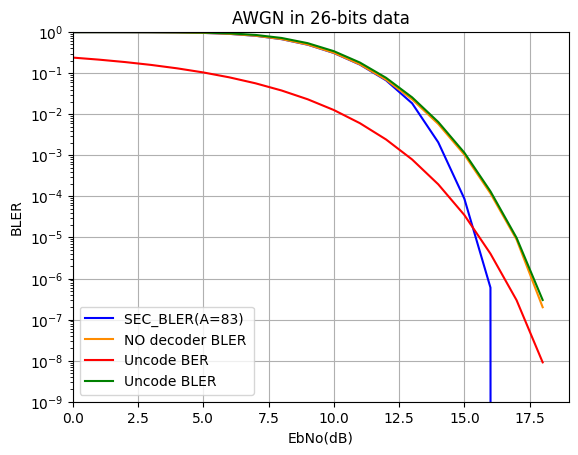

In [14]:
two_d_BLER83=plt.plot( EbNodB_range, two_d_array_bler83, 'b',label="SEC_BLER(A=83) ")
only_q83=plt.plot( EbNodB_range, q_ber83, color='#FF8C00',label="NO decoder BLER")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'r',label="Uncode BER")
uncode_bler_line=plt.plot(EbNodB_range,uncode_bler,'g',label="Uncode BLER")


#hamming_ber_line=plt.plot(EbNodB_range, hamming_ber, 'y',label="(7,4)hamming_ber")
plt.legend()
#plt.plot(EbNodB_range, an_decode_ber, 'b')
plt.axis([0, itr, 1e-9, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BLER')
plt.grid(True)
plt.title('AWGN in 26-bits data')
plt.savefig("AWGN in 26bits SEC")
plt.show()

### 使用查找表更正
* Function Definition

In [15]:
import math
import numpy as np

def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


def create_mapping(source_list, address_map):
    """
    建立值到位址和位址到值的雙向映射。
    若 address_map 中某位址沒有對應值，則該位址的值為 0。
    
    參數:
    source_list (list): 原始資料列表。
    address_map (list): 位址映射列表。
    
    回傳:
    tuple: (值到位址的映射, 位址到值的映射)
    """
    # 初始化值到位址的映射
    value_to_address = {value: addr for value, addr in zip(source_list, address_map)}
    
    # 初始化位址到值的映射，未指定的位址預設為 0
    max_address = max(address_map)  # 確保涵蓋所有位址
    address_to_value = {addr: 0 for addr in range(max_address + 1)}  # 預設為 0
    for value, addr in zip(source_list, address_map):
        address_to_value[addr] = value  # 更新有指定值的位址

    return value_to_address, address_to_value
def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


In [16]:
### 輸入數值為data, ANcode的A為AN
### 乘完A後的數值為 input
data = 67108864
AN =  13837    ## AN:13837, 只適用輸入為0 ~ 67108864
input = data*AN
bits = bits_needed(input)

### 1-bit AWE:
AWE_1=[]
e1=0     ## 錯誤數量
e1_data=[]
for i in range(0, bits):
    AWE_1.insert(e1 , input + 2**i)
    e1_data.insert(e1, 2**i)
    e1 = e1 + 1
    AWE_1.insert(e1 , input - 2**i)
    e1_data.insert(e1, -2**i)
    e1 = e1 + 1
    
### 2-bit AWE:
AWE_2=[]
e2=0     ## 錯誤數量
p=0      ## 錯誤位置
e2_data=[]
for i in range(0, bits):
    for j in range(i+1, bits):
        AWE_2.insert(e2 , (input + 2**i + 2**j))
        e2_data.insert(e2 , (2**i + 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input + 2**i - 2**j))
        e2_data.insert(e2 , (2**i - 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i + 2**j))
        e2_data.insert(e2 , (-2**i + 2**j))                
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i -2**j))
        e2_data.insert(e2 , (-2**i - 2**j))
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        p = p + 1
        
## 把list:AWE_1 和 list:AWE_2合併
AWE = AWE_1 + AWE_2
e_total = e1_data + e2_data
## 把重複的 AWE 去除
new_AWE = remove_duplicates(AWE)
new_e_total = remove_duplicates(e_total)
AWE_count = np.size(new_AWE)
e_count = np.size(new_e_total)

### 模AN, 使用一般mod函數和 Barret reduction 比較
remainder = []
for m in range(0,AWE_count):
    mod = new_AWE[m] % AN
    remainder.append(mod)

print("錯誤資料對AN取完模數:\n",remainder)

##############################################################
### Barret reduction ###
def Barret_q_13837(x):
    x = np.int64(x)      
    q = (int(x) * 79461706) >> 40        ## (2^40)//13837後, 右移40次 
    r = x - q * 13837
    if r < 13837:
        return (r,q)
    else:
        return (r - 13837,q+1)
    
Barret_remainder = []
for m in range(0,AWE_count):
    Barret_r,Barret_q = Barret_q_13837(new_AWE[m])
    Barret_remainder.append(Barret_r)
    
print("Barret reduction對錯誤資料取完模數:\n",Barret_remainder)
print("Barret reduction是否可以使用:", Barret_remainder == remainder)
#################################################################
print("所有餘數(一般mod函數)是否完全相異:", remainder_unique(remainder))
print("所有餘數(Barret reduction)是否完全相異:", remainder_unique(Barret_remainder))
print("所有的AWE:\n", new_e_total)
print(np.size(remainder))

### 建立錯誤映射表(LUT)
## Decoder
AWE_to_remainder, remainder_to_AWE = create_mapping(new_e_total, Barret_remainder)

## example
example_r1 = Barret_remainder[0]
example_r2 = Barret_remainder[1]
print(f"輸入餘數 {example_r1}, 對應算術錯誤: {remainder_to_AWE[example_r1]}")
print(f"輸入餘數 {example_r2}, 對應算術錯誤: {remainder_to_AWE[example_r2]}")

Raw_data1 = new_AWE[0]-remainder_to_AWE[example_r1]
Raw_data2 = new_AWE[1]-remainder_to_AWE[example_r2]
print(Raw_data1)
print(Raw_data2)
print("更正是否正確:", input == Raw_data1)

第 0 筆錯誤資料: 928585351171
第 0 筆算術錯誤: 3
第 1 筆錯誤資料: 928585351167
第 1 筆算術錯誤: -1
第 2 筆錯誤資料: 928585351169
第 2 筆算術錯誤: 1
第 3 筆錯誤資料: 928585351165
第 3 筆算術錯誤: -3
第 4 筆錯誤資料: 928585351173
第 4 筆算術錯誤: 5
第 5 筆錯誤資料: 928585351165
第 5 筆算術錯誤: -3
第 6 筆錯誤資料: 928585351171
第 6 筆算術錯誤: 3
第 7 筆錯誤資料: 928585351163
第 7 筆算術錯誤: -5
第 8 筆錯誤資料: 928585351177
第 8 筆算術錯誤: 9
第 9 筆錯誤資料: 928585351161
第 9 筆算術錯誤: -7
第 10 筆錯誤資料: 928585351175
第 10 筆算術錯誤: 7
第 11 筆錯誤資料: 928585351159
第 11 筆算術錯誤: -9
第 12 筆錯誤資料: 928585351185
第 12 筆算術錯誤: 17
第 13 筆錯誤資料: 928585351153
第 13 筆算術錯誤: -15
第 14 筆錯誤資料: 928585351183
第 14 筆算術錯誤: 15
第 15 筆錯誤資料: 928585351151
第 15 筆算術錯誤: -17
第 16 筆錯誤資料: 928585351201
第 16 筆算術錯誤: 33
第 17 筆錯誤資料: 928585351137
第 17 筆算術錯誤: -31
第 18 筆錯誤資料: 928585351199
第 18 筆算術錯誤: 31
第 19 筆錯誤資料: 928585351135
第 19 筆算術錯誤: -33
第 20 筆錯誤資料: 928585351233
第 20 筆算術錯誤: 65
第 21 筆錯誤資料: 928585351105
第 21 筆算術錯誤: -63
第 22 筆錯誤資料: 928585351231
第 22 筆算術錯誤: 63
第 23 筆錯誤資料: 928585351103
第 23 筆算術錯誤: -65
第 24 筆錯誤資料: 928585351297
第 24 筆算術錯誤: 129
第 25 筆錯誤資料: 9285853

## 使用查找表更正2-bits Error 的BLER

In [17]:
# 傳遞資料為0 ~ 67108864(26-bits)的無號數整數
message=[]
message_count=10000000
for i in range(message_count):
    message.append(random.randint(0,67108864))

## DEC_AN=13837乘積編碼
codeword13837=[]
for element in message:
    codeword13837.append(element*13837)
    
#turn *13837 into binary
codeword13837_bin=[]
for ele in codeword13837:
    s='{0:040b}'.format(ele)
    codeword13837_bin.append(s)
#codeword13837_bin


#can be replaced by np.reshape
bit13837_part=[]
for c_bin in codeword13837_bin:
    for single_bit in c_bin:
            bit13837_part.append(int(single_bit))
#transmition bit
tran13837=[]
for b in bit13837_part:
    if b==1:
        tran13837.append(1)
    else:
        tran13837.append(0)


In [18]:
N = message_count*40
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
uncode_bler=[None]*itr
bler=[None]*itr

two_d_array_bler13837=[None]*itr
q_ber13837=[None]*itr


19


In [19]:
## transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    x13837 = tran13837 
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    uncode_bit_noise= x13837 + noise_std * randn(N)

    ######  receive  for uncode_bit_noise ########## 
    receive13837=[]
    for receive_bit in uncode_bit_noise:
        if(receive_bit >= 0.5):
            receive13837.append(1)
        else:
            receive13837.append(0)
    ################################################
    
    

    #reshape
    temp13837 = np.reshape(receive13837, (message_count, 40))
    
    #bit to decimal
    receive13837_decimal = []
    for ele in temp13837:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(39-ind)*val+int_out
        receive13837_decimal.append(int_out)

    # 2d array 
    decode13837_num_msg=[]
    decode13837_num_codeword=[]
    q13837_check_list=[]
    #10x10x2 array
    for i in range(message_count//100):
        receive13837_decimal_100=[]
        receive13837_decimal_100=receive13837_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r13837_list=[]
        q13837_list=[]

        for ele in receive13837_decimal_100:
            r,q=Barret_q_13837(ele)
            r13837_list.append(r)
            q13837_list.append(q)

            q13837_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r13837_list[i],q13837_list[i]]  

        error13837_row=[]
        error13837_col=[]
        for i in range(10):
            s_r13837=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c13837=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error13837_row.append(s_r13837)
            error13837_col.append(s_c13837)
        #turn into true false
        for ind,val in enumerate(error13837_row):
            if(val!=0):
                error13837_row[ind]=True
            else:
                error13837_row[ind]=False

        for ind,val in enumerate(error13837_col):
            if(val!=0):
                error13837_col[ind]=True
            else:
                error13837_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table13837_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table13837_for_row_col[i,j] = error13837_row[i] and error13837_col[j]

        true_false_table13837_for_row_col=true_false_table13837_for_row_col.reshape(100,1)
        error_index_from_TF13837_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table13837_for_row_col):
            if(ele):
                error_index_from_TF13837_table=ind
                break

        if(error_index_from_TF13837_table==-1):
            decode13837_msg100=q13837_list
            decode13837_num_msg.extend(decode13837_msg100)
            #print(len(decode1939_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive13837_decimal_100[error_index_from_TF13837_table]
            r,q=Barret_q_13837(error_codeword)
            ### using LUT to recover it 
            RAW_DATA = np.int64(error_codeword) - np.int64(remainder_to_AWE[r])
            ### mod 13837 to get correct data
            corrected_r,corrected_q = Barret_q_13837(RAW_DATA)
            q13837_list[ind]=corrected_q
            decode13837_msg100=q13837_list
            decode13837_num_msg.extend(decode13837_msg100)
            #print(len(decode13_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER13837_ERROR=0
    for c in range(len(decode13837_num_msg)):
        if(decode13837_num_msg[c] !=message[c]):
            BLER13837_ERROR=BLER13837_ERROR+1  
    two_d_array_bler13837[n] =1.0 * BLER13837_ERROR / message_count
    ########################################
    #uncode BLER
    uncode_error=0
    for b in range(message_count):
        if np.any(receive13837_decimal[b] != codeword13837[b]):
            uncode_error = uncode_error + 1  
    uncode_bler[n] =1.0 * uncode_error / message_count
    #########################################
    ## uncode BER
    uncode_ber_error = 0
    uncode_ber_error = sum(a != b for a, b in zip(x13837, receive13837))
    uncode_ber[n]= 1.0 * uncode_ber_error / N
    ########################################
    ### no decoder for AN
    q13837_num=0
    for i in range(len(decode13837_num_msg)):
        if(message[i]!=q13837_check_list[i]):
            q13837_num=q13837_num+1

    q_ber13837[n]=1.*q13837_num/len(decode13837_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded BLER:", uncode_bler[n])
    print("Uncoded BER:", uncode_ber[n])
    print ("BLER without decoder:", q_ber13837[n] )
    print ("BLER with decoder A=13837:", two_d_array_bler13837[n])

    

EbNodB: 0
Uncoded BLER: 0.9999825
Uncoded BER: 0.2397582575
BLER without decoder: 0.9995702
BLER with decoder A=13837: 0.999552
EbNodB: 1
Uncoded BLER: 0.9999366
Uncoded BER: 0.2138246875
BLER without decoder: 0.9989597
BLER with decoder A=13837: 0.9989099
EbNodB: 2
Uncoded BLER: 0.9997397
Uncoded BER: 0.1866459825
BLER without decoder: 0.997437
BLER with decoder A=13837: 0.9972942
EbNodB: 3
Uncoded BLER: 0.9990174
Uncoded BER: 0.1589095175
BLER without decoder: 0.9937751
BLER with decoder A=13837: 0.9934072
EbNodB: 4
Uncoded BLER: 0.9964301
Uncoded BER: 0.131216005
BLER without decoder: 0.9850848
BLER with decoder A=13837: 0.9842173
EbNodB: 5
Uncoded BLER: 0.9877547
Uncoded BER: 0.1042987375
BLER without decoder: 0.9649256
BLER with decoder A=13837: 0.9631049
EbNodB: 6
Uncoded BLER: 0.963117
Uncoded BER: 0.0791583025
BLER without decoder: 0.922631
BLER with decoder A=13837: 0.919428
EbNodB: 7
Uncoded BLER: 0.9032291
Uncoded BER: 0.0567112875
BLER without decoder: 0.8416851
BLER with d

In [20]:
print(two_d_array_bler13837)
print(two_d_array_bler83)

[0.999552, 0.9989099, 0.9972942, 0.9934072, 0.9842173, 0.9631049, 0.919428, 0.8370802, 0.7039585, 0.527104, 0.3376012, 0.1788327, 0.0751813, 0.0217517, 0.002638, 9.96e-05, 1.7e-06, 0.0, 0.0]
[0.9995094, 0.998822, 0.9970594, 0.9925982, 0.9817621, 0.9572599, 0.9068634, 0.8149676, 0.6737136, 0.4937067, 0.3103137, 0.1617087, 0.0670107, 0.0184475, 0.0020722, 8.8e-05, 6e-07, 0.0, 0.0]


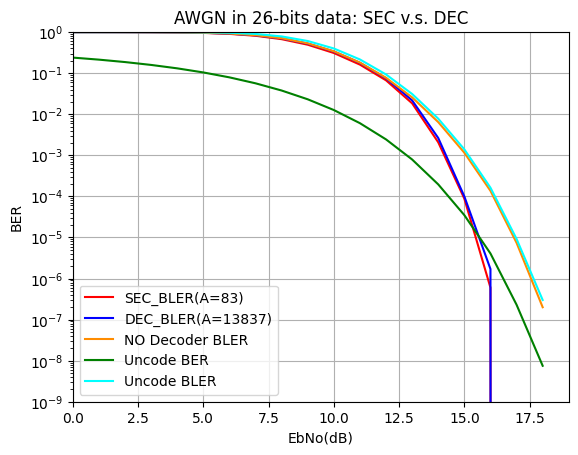

In [21]:
two_d_BLER83=plt.plot( EbNodB_range, two_d_array_bler83,'r',label="SEC_BLER(A=83)")
two_d_BLER13837=plt.plot( EbNodB_range, two_d_array_bler13837,'b',label="DEC_BLER(A=13837)")
only_q13837=plt.plot( EbNodB_range, q_ber13837, color='#FF8C00',label="NO Decoder BLER")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'g',label="Uncode BER")
uncode_bLer_line=plt.plot(EbNodB_range,uncode_bler,color='#00FFFF',label="Uncode BLER")


plt.legend()
plt.axis([0, itr, 1e-9, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('AWGN in 26-bits data: SEC v.s. DEC')
plt.savefig("AWGN in 26bits SEC vs DEC")
plt.show()

In [22]:
import numpy as np

threshold = 0.5

# 生成漢明碼的生成矩陣 G 和校驗矩陣 H (以 (7,4) 漢明碼為例)
def generate_hamming_matrices():
    G = np.array([
        [1, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 1, 1, 1]
    ])
    
    H = np.array([
        [1, 1, 0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 1]
    ])
    return G, H

# 對訊息進行漢明編碼
def hamming_encode(message, G):
    msg = np.array(message, dtype=int)
    codeword = np.mod(msg @ G, 2)
    return codeword

# AWGN 通道模擬（無BPSK調變，直接baseband 0/1）
def awgn_channel(codeword, snr_db):
    signal = codeword.astype(float)
    snr_linear = 10**(snr_db / 10)
    noise_std = np.sqrt(0.5 / snr_linear)
    noise = noise_std * np.random.randn(len(signal))
    received_signal = signal + noise
    received_codeword = (received_signal >= threshold).astype(int)
    return received_codeword

# 漢明碼錯誤校正
def hamming_decode(received_codeword, H):
    syndrome = np.mod(received_codeword @ H.T, 2)
    syndrome_value = syndrome[0] * 4 + syndrome[1] * 2 + syndrome[2]
    
    error_patterns = {
        0: [0, 0, 0, 0, 0, 0, 0],
        1: [0, 0, 0, 0, 0, 0, 1],
        2: [0, 0, 0, 0, 0, 1, 0],
        3: [0, 0, 0, 0, 1, 0, 0],
        4: [0, 0, 0, 1, 0, 0, 0],
        5: [0, 0, 1, 0, 0, 0, 0],
        6: [0, 1, 0, 0, 0, 0, 0],
        7: [1, 0, 0, 0, 0, 0, 0]
    }
    
    error = error_patterns.get(syndrome_value, [0, 0, 0, 0, 0, 0, 0])
    corrected_codeword = np.mod(received_codeword + error, 2)
    decoded_message = corrected_codeword[:4]
    return decoded_message

# 產生隨機的4-bit message
def generate_random_message():
    return np.random.randint(0, 2, size=4)

### 主程式：模擬不同SNR下的BLER
def simulate_bler():
    G, H = generate_hamming_matrices()
    
    snr_range = range(0, 19)  # SNR 0~18 dB
    num_trials = 10000000  # 每個SNR重複模擬次數
    hamming_bler_list = []
    ### uncode_bler_list = []
    
    for snr_db in snr_range:
        hamming_error_count = 0
        ### uncode_error_count = 0
        total_blocks = 0
        
        for _ in range(num_trials):
            message = generate_random_message()

            # 編碼傳輸
            codeword = hamming_encode(message, G)
            received_codeword = awgn_channel(codeword, snr_db)

            ## 不編碼直接傳
            ### uncode_received = awgn_channel(message, snr_db)
            # Uncoded BLER: 只要4-bit裡有1個錯，整個block算錯
            ### if np.any(uncode_received != message):
                ### uncode_error_count += 1

            # Hamming BLER: 解碼完還原訊息，4-bit裡有1個錯，整個block算錯
            decoded_message = hamming_decode(received_codeword, H)
            if np.any(decoded_message != message):
                hamming_error_count += 1

            
        
        
        hamming_bler = hamming_error_count / num_trials
        hamming_bler_list.append(hamming_bler)
        ### uncode_bler = uncode_error_count / num_trials
        ### uncode_bler_list.append(uncode_bler)
        
        print(f"SNR = {snr_db} dB, Hamming BLER = {hamming_bler:.6f}")

    return snr_range,  hamming_bler_list

if __name__ == "__main__":
    snr_range, hamming_bler_list = simulate_bler()
    print("Hamming BLER:", hamming_bler_list)


SNR = 0 dB, Hamming BLER = 0.717693
SNR = 1 dB, Hamming BLER = 0.674557
SNR = 2 dB, Hamming BLER = 0.623284
SNR = 3 dB, Hamming BLER = 0.562420
SNR = 4 dB, Hamming BLER = 0.492453
SNR = 5 dB, Hamming BLER = 0.415153
SNR = 6 dB, Hamming BLER = 0.332827
SNR = 7 dB, Hamming BLER = 0.250462
SNR = 8 dB, Hamming BLER = 0.173991
SNR = 9 dB, Hamming BLER = 0.109994
SNR = 10 dB, Hamming BLER = 0.061607
SNR = 11 dB, Hamming BLER = 0.029926
SNR = 12 dB, Hamming BLER = 0.012186
SNR = 13 dB, Hamming BLER = 0.003953
SNR = 14 dB, Hamming BLER = 0.000982
SNR = 15 dB, Hamming BLER = 0.000177
SNR = 16 dB, Hamming BLER = 0.000018
SNR = 17 dB, Hamming BLER = 0.000001
SNR = 18 dB, Hamming BLER = 0.000000
Hamming BLER: [0.717693, 0.6745568, 0.6232844, 0.5624197, 0.4924529, 0.4151532, 0.3328271, 0.2504624, 0.1739915, 0.109994, 0.0616066, 0.0299257, 0.0121859, 0.0039528, 0.000982, 0.0001766, 1.85e-05, 1.1e-06, 0.0]


In [24]:
print(two_d_array_bler83)
print(two_d_array_bler13837)
print(hamming_bler_list)
print(uncode_bler)

[0.9995094, 0.998822, 0.9970594, 0.9925982, 0.9817621, 0.9572599, 0.9068634, 0.8149676, 0.6737136, 0.4937067, 0.3103137, 0.1617087, 0.0670107, 0.0184475, 0.0020722, 8.8e-05, 6e-07, 0.0, 0.0]
[0.999552, 0.9989099, 0.9972942, 0.9934072, 0.9842173, 0.9631049, 0.919428, 0.8370802, 0.7039585, 0.527104, 0.3376012, 0.1788327, 0.0751813, 0.0217517, 0.002638, 9.96e-05, 1.7e-06, 0.0, 0.0]
[0.717693, 0.6745568, 0.6232844, 0.5624197, 0.4924529, 0.4151532, 0.3328271, 0.2504624, 0.1739915, 0.109994, 0.0616066, 0.0299257, 0.0121859, 0.0039528, 0.000982, 0.0001766, 1.85e-05, 1.1e-06, 0.0]
[0.9999825, 0.9999366, 0.9997397, 0.9990174, 0.9964301, 0.9877547, 0.963117, 0.9032291, 0.7861768, 0.6079968, 0.3996376, 0.2158786, 0.0930893, 0.0311481, 0.0078044, 0.001395, 0.0001629, 9.2e-06, 3e-07]


In [ ]:
##-------------------------------------
## 由於模擬時間過久
## infer 為根據曲線趨勢所評估計算的數據
##-------------------------------------
infer_83_1 =   3.33e-09              ## 7.38e-09
infer_83_2 =   1.1136e-11            ## 9.33e-11
infer_13837_1 =  1.0303e-08          ## 1.68e-08
infer_13837_2 =  9.08e-11            ## 2.83e-10
infer_hamming_1 =  4e-08             ## 8.29e-8
two_d_array_bler83 = [0.9995094, 0.998822, 0.9970594, 0.9925982, 0.9817621, 0.9572599, 0.9068634, 0.8149676, 0.6737136, 0.4937067, 0.3103137, 0.1617087, 0.0670107, 0.0184475, 0.0020722, 8.8e-05, 6e-07, infer_83_1, infer_83_2]
two_d_array_bler13837 = [0.999552, 0.9989099, 0.9972942, 0.9934072, 0.9842173, 0.9631049, 0.919428, 0.8370802, 0.7039585, 0.527104, 0.3376012, 0.1788327, 0.0751813, 0.0217517, 0.002638, 9.96e-05, 1.7e-06, infer_13837_1, infer_13837_2]
hamming_bler_list = [0.717693, 0.6745568, 0.6232844, 0.5624197, 0.4924529, 0.4151532, 0.3328271, 0.2504624, 0.1739915, 0.109994, 0.0616066, 0.0299257, 0.0121859, 0.0039528, 0.000982, 0.0001766, 1.85e-05, 1.1e-06, infer_hamming_1]
uncode_bler = [0.9999825, 0.9999366, 0.9997397, 0.9990174, 0.9964301, 0.9877547, 0.963117, 0.9032291, 0.7861768, 0.6079968, 0.3996376, 0.2158786, 0.0930893, 0.0311481, 0.0078044, 0.001395, 0.0001629, 9.2e-06, 3e-07]



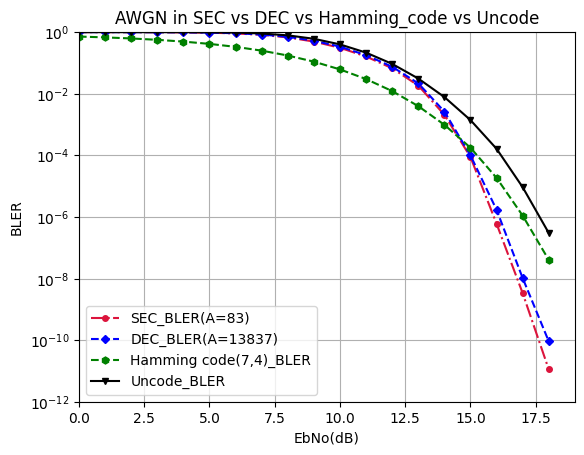

In [46]:
two_d_BLER83=plt.plot( EbNodB_range, two_d_array_bler83,marker='o',linestyle='-.',color='#DC143C',markersize=4,label="SEC_BLER(A=83)")
two_d_BLER13837=plt.plot( EbNodB_range, two_d_array_bler13837,marker='D', linestyle='--',color='#0000FF',markersize=4,label="DEC_BLER(A=13837)")
hamming=plt.plot(EbNodB_range, hamming_bler_list , marker='h', linestyle='--',color='#008000',markersize=5,label="Hamming code(7,4)_BLER")
uncode_bLer_line=plt.plot(EbNodB_range,uncode_bler,marker='v', linestyle='-', color='#000000',markersize=5,label="Uncode_BLER")


plt.legend()
plt.axis([0, itr, 1e-12, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BLER')
plt.grid(True)
plt.title('AWGN in SEC vs DEC vs Hamming_code vs Uncode')
plt.savefig("AWGN in 26bits SEC vs DEC vs Hamming_code vs Uncode")
plt.show()